In [1]:
!pip install -U fiona shapely pyproj rtree

!pip install -U geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
colonias = gpd.read_file('zip:///content/drive/MyDrive/Colonias CDMX/data/espacial/colonias_seduvi.zip').drop(columns=['pob_2010','area','perimetro','cve_ent'])

In [5]:
comedores = pd.read_csv('/content/drive/MyDrive/Colonias CDMX/data/variables/comedores-cdmx.csv', usecols=['longitud','latitud','id_comedor',"tp_srvc"]).query('latitud>0').rename(columns={"id_comedor":"folio","tp_srvc":"tipo_comedor"})
comedores_pop = pd.read_csv('/content/drive/MyDrive/Colonias CDMX/data/variables/comedores-populares-dif.csv', usecols=['longitud','latitud','folio',"tipo_comedor"]).query('latitud>0')
comedores_pub = pd.read_csv('/content/drive/MyDrive/Colonias CDMX/data/variables/comedores-publicos-moviles-y-comunitarios-2021.csv',usecols=['longitud','latitud','folio',"tipo_comedor"])

In [6]:
comedores_full = pd.concat([comedores, comedores_pop, comedores_pub])
comedores_full["folio"] = comedores_full.folio.str.strip().str.upper()
comedores_full.drop_duplicates(["folio", "tipo_comedor"], ignore_index = True, inplace = True )

In [7]:
comedores_full

,folio,tipo_comedor,latitud,longitud
0,CC005,Comedor Comunitario,19.192554,-99.092682
1,CC003,Comedor Comunitario,19.520542,-99.162739
2,CC006,Comedor Comunitario,19.4468,-99.199796
3,CC008,Comedor Comunitario,19.46026,-99.183740
4,CC018,Comedor Comunitario,19.380637,-99.097846
...,...,...,...,...
671,CPM08,Comedor Móvil,19.450783,-99.169736
672,CPM09,Comedor Móvil,19.30487816,-99.186069
673,CPM10,Comedor Móvil,19.254543,-99.105298
674,CPM11,Comedor Móvil,19.40270636,-99.190718


In [8]:
comedores_full["latitud"] = [float(i.replace(", \n","")) if isinstance(i,str) else i for i in comedores_full["latitud"]]

In [9]:
comedores_full['cnt'] = 1

In [10]:
comedores_full

,folio,tipo_comedor,latitud,longitud,cnt
0,CC005,Comedor Comunitario,19.192554,-99.092682,1
1,CC003,Comedor Comunitario,19.520542,-99.162739,1
2,CC006,Comedor Comunitario,19.446800,-99.199796,1
3,CC008,Comedor Comunitario,19.460260,-99.183740,1
4,CC018,Comedor Comunitario,19.380637,-99.097846,1
...,...,...,...,...,...
671,CPM08,Comedor Móvil,19.450783,-99.169736,1
672,CPM09,Comedor Móvil,19.304878,-99.186069,1
673,CPM10,Comedor Móvil,19.254543,-99.105298,1
674,CPM11,Comedor Móvil,19.402706,-99.190718,1


In [11]:
geo_comedores_full = gpd.GeoDataFrame(comedores_full,
                           geometry=gpd.points_from_xy(comedores_full.longitud, comedores_full.latitud),
                           crs='epsg:4326').to_crs(colonias.crs)

In [12]:
geo_comedores_full

,folio,tipo_comedor,latitud,longitud,cnt,geometry
0,CC005,Comedor Comunitario,19.192554,-99.092682,1,POINT (490256.522 2122135.962)
1,CC003,Comedor Comunitario,19.520542,-99.162739,1,POINT (482925.716 2158434.020)
2,CC006,Comedor Comunitario,19.446800,-99.199796,1,POINT (479028.242 2150278.271)
3,CC008,Comedor Comunitario,19.460260,-99.183740,1,POINT (480715.108 2151765.759)
4,CC018,Comedor Comunitario,19.380637,-99.097846,1,POINT (489725.316 2142947.889)
...,...,...,...,...,...,...
671,CPM08,Comedor Móvil,19.450783,-99.169736,1,POINT (482183.941 2150715.606)
672,CPM09,Comedor Móvil,19.304878,-99.186069,1,POINT (480452.180 2134572.599)
673,CPM10,Comedor Móvil,19.254543,-99.105298,1,POINT (488934.353 2128995.815)
674,CPM11,Comedor Móvil,19.402706,-99.190718,1,POINT (479975.699 2145398.068)


In [13]:
colonias_comedores_full = gpd.sjoin_nearest(colonias, geo_comedores_full,
                                 distance_col='dist', how="right")

In [14]:
colonias_comedores_full.sort_values('dist')

,index_left,alcaldia,cve_col,colonia,folio,tipo_comedor,latitud,longitud,cnt,geometry,dist
0,1219,MILPA ALTA,09-010,SAN SALVADOR CUAUHTENCO (PBLO),CC005,Comedor Comunitario,19.192554,-99.092682,1,POINT (490256.522 2122135.962),0.000000
446,718,GUSTAVO A. MADERO,05-185,TORRES DE QUIROGA (U HAB),CP016,Comedor Público,19.503418,-99.082867,1,POINT (491304.850 2156533.200),0.000000
447,557,GUSTAVO A. MADERO,05-029,CONSTITUCION DE LA REPUBLICA,CP019,Comedor Público,19.481176,-99.100440,1,POINT (489459.422 2154073.000),0.000000
448,926,IZTAPALAPA,07-130,LOS ANGELES,CP025,Comedor Público,19.345928,-99.070878,1,POINT (492555.616 2139105.910),0.000000
449,1403,TLAHUAC,11-025,MIGUEL HIDALGO,CP034,Comedor Público,19.288226,-99.050208,1,POINT (494724.778 2132720.274),0.000000
...,...,...,...,...,...,...,...,...,...,...,...
230,7,AZCAPOTZALCO,02-010,COSMOPOLITA,CC499,Comedor Comunitario,19.473507,-99.163758,1,POINT (482813.786 2153229.537),0.000000
223,1495,VENUSTIANO CARRANZA,17-035,LORENZO BOTURINI,CC460,Comedor Comunitario,19.415853,-99.123335,1,POINT (487051.563 2146846.330),0.000000
675,586,GUSTAVO A. MADERO,05-070,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),CPM12,Comedor Móvil,19.480985,-99.103488,1,POINT (489139.528 2154052.097),0.000000
68,1418,TLAHUAC,11-039,SANTA CATARINA (AMPL),CC406,Comedor Comunitario,19.317724,-98.961852,1,POINT (504007.381 2135983.970),25.631357


In [15]:
colonias_join = colonias_comedores_full[~colonias_comedores_full.dist.isna()].query('dist<1000').sort_values('dist')
colonias_join = colonias_join.groupby(['cve_col','colonia','tipo_comedor']).cnt.sum().unstack().reset_index().fillna(0)

In [16]:
colonias_join

tipo_comedor,cve_col,colonia,Comedor Comunitario,Comedor Móvil,Comedor Popular,Comedor Público
0,02-007,CENTRO DE AZCAPOTZALCO,0.0,1.0,0.0,0.0
1,02-009,COLTONGO,1.0,0.0,0.0,0.0
2,02-010,COSMOPOLITA,1.0,0.0,0.0,0.0
3,02-015,DEL GAS,1.0,0.0,0.0,0.0
4,02-024,EL ROSARIO B (U HAB),0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
462,17-074,IGNACIO ZARAGOZA I,1.0,0.0,0.0,0.0
463,17-080,MOCTEZUMA 2A SECCION II,1.0,0.0,0.0,0.0
464,17-083,MORELOS I,1.0,0.0,0.0,0.0
465,17-084,MORELOS II,1.0,0.0,0.0,2.0


In [17]:
colonias_final = pd.merge(colonias, colonias_join, on=['cve_col','colonia'])

In [18]:
colonias_final['Total'] = colonias_final.iloc[:,4:].sum(axis=1)

In [19]:
colonias_final.rename(columns={col:col.replace('Comedor','').replace("Móvil","Movil").replace("Público","Publico").strip() for col in colonias_final.columns},
                      inplace=True)

In [20]:
colonias_final

,alcaldia,cve_col,colonia,geometry,Comunitario,Movil,Popular,Publico,Total
0,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,"POLYGON ((480104.707 2154525.214, 480118.178 2...",0.0,1.0,0.0,0.0,1.0
1,AZCAPOTZALCO,02-009,COLTONGO,"POLYGON ((484377.983 2154055.376, 484452.496 2...",1.0,0.0,0.0,0.0,1.0
2,AZCAPOTZALCO,02-010,COSMOPOLITA,"POLYGON ((482934.023 2153546.854, 482964.261 2...",1.0,0.0,0.0,0.0,1.0
3,AZCAPOTZALCO,02-015,DEL GAS,"POLYGON ((483887.486 2153038.087, 483873.974 2...",1.0,0.0,0.0,0.0,1.0
4,AZCAPOTZALCO,02-024,EL ROSARIO B (U HAB),"POLYGON ((478449.089 2157159.353, 478449.445 2...",0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
462,ALVARO OBREGON,10-214,TETELPAN (PBLO),"POLYGON ((476550.237 2138779.740, 476550.185 2...",1.0,0.0,0.0,0.0,1.0
463,ALVARO OBREGON,10-219,TLACOYAQUE,"POLYGON ((472065.012 2136179.092, 472061.862 2...",0.0,0.0,1.0,0.0,1.0
464,ALVARO OBREGON,10-224,TLAPECHICO,"POLYGON ((474151.849 2142822.803, 474197.184 2...",1.0,0.0,0.0,0.0,1.0
465,ALVARO OBREGON,10-236,VILLA PROGRESISTA,"POLYGON ((474406.945 2140353.439, 474418.850 2...",1.0,0.0,0.0,0.0,1.0


In [21]:
colonias_final = pd.concat([colonias_final,
                            colonias[~(colonias.cve_col.isin(colonias_final.cve_col))]],
                            ignore_index=True
                            ).fillna(0)

In [22]:
colonias_final.to_file("/content/drive/MyDrive/Colonias CDMX/comedores/comedores.shp",
                       index=False)

<ipython-input-22-b78a502c83a6>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  colonias_final.to_file("/content/drive/MyDrive/Colonias CDMX/comedores/comedores.shp",


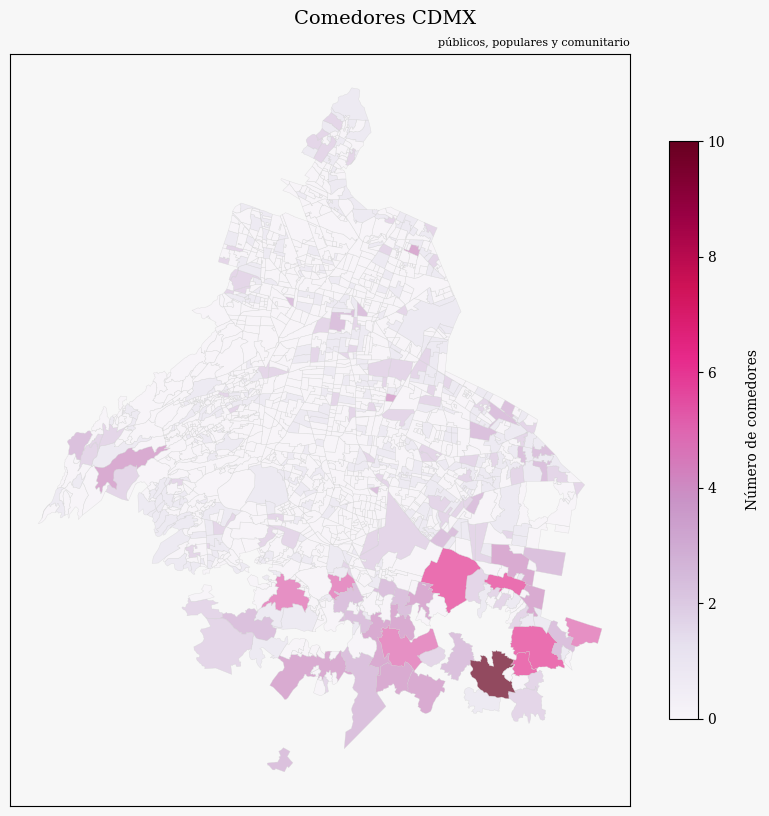

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'

fig = plt.figure(figsize=(10, 15))

ax = colonias_final.plot(column="Total", ax=plt.gca(),
                         cmap='PuRd',alpha=.7, legend=True,
                         legend_kwds={"shrink": 0.5},ec='lightgray',
                         linewidth=.3)  # Agregar '_r' para invertir la paleta de colores

color_fondo = '#f7f7f7'
ax.set_facecolor(color_fondo)
fig.patch.set_facecolor(color_fondo)

ax.set_xticks([])
ax.set_yticks([])

plt.suptitle("Comedores CDMX", y=0.775, fontsize=14)
plt.title('públicos, populares y comunitario', loc='right', fontsize=8)

cax = ax.get_figure().get_axes()[1]
cax.set_ylabel('Número de comedores', rotation=90, labelpad=15)

# Guardar el gráfico como una imagen
plt.savefig('/content/drive/MyDrive/Colonias CDMX/comedores/comedores_2023.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


In [ ]:
colonias_final.columns

Index(['alcaldia', 'cve_col', 'colonia', 'geometry', 'Comunitario', 'Movil',
       'Popular', 'Publico', 'Total'],
      dtype='object')